In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Labwork 1
======

Набор данных ex1data1.txt представляет собой текстовый файл, содержащий информацию о населении городов (первое число в строке) и прибыли ресторана, достигнутой в этом городе (второе число в строке). Отрицательное значение прибыли означает, что в данном городе ресторан терпит убытки.
Набор данных ex1data2.txt представляет собой текстовый файл, содержащий информацию о площади дома в квадратных футах (первое число в строке), количестве комнат в доме (второе число в строке) и стоимости дома (третье число).

1. Загрузите набор данных ex1data1.txt из текстового файла.

In [180]:
data_row1 = np.genfromtxt('ex1data1.txt', delimiter=',')
data1 = pd.DataFrame(data_row1, columns=list(['Population', 'Profit']))
data1.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

<Figure size 432x288 with 0 Axes>

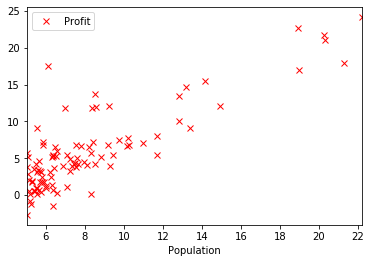

In [119]:
plt.figure()
data1.plot(x='Population', y='Profit',  style=['rx'])

3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

In [120]:
def computeCost(X, y, theta):
    h = [np.matmul(x, theta.T).sum() for x in X]
    return np.power(h - y, 2).sum() / (2 * m)

In [181]:
m = data_row1.shape[0] # Size of training set
n = data_row1.shape[1] # Size of feature vector
X1 = data1[['Population']]
X1.insert(0, 'theta_0', 1)
y1 = data1['Profit']
theta = np.zeros((1, n)) # theta coeficents for hypothesis func
X1.head()

,theta_0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [150]:
computeCost(X1.to_numpy(), y1.to_numpy(), theta)

32.072733877455676

4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.

In [174]:
#function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
# GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # Size of training set
    n = X.shape[1]  # Size of feature vector
    j_history = []
    for i in range(0, num_iters):
        deltas = np.zeros(n)
        for j in range(0, n):
            xj = X[:, j]
            h = [np.matmul(x, theta.T)[0] for x in X]
            deltas[j] = ((h - y) * xj).sum() * alpha / m
        theta[0] -= deltas
        j_history.append(computeCost(X, y, theta))

    return theta, j_history

In [182]:
iterations = 1500
alpha = 0.01
(theta, j_history) = gradientDescent(X1.to_numpy(), y1.to_numpy(), theta, alpha, iterations)

In [183]:
theta

array([[-3.63029144,  1.16636235]])

For population = 35,000, we predict a profit of

In [184]:
np.matmul([1, 3.5], theta.T).sum() * 10000 #predict1

4519.767867701772

For population = 70,000, we predict a profit of

In [185]:
np.matmul([1, 7], theta.T).sum() * 10000 #predict2

45342.45012944714

In [186]:
h = [np.matmul(x, theta.T).sum() for x in X1.to_numpy()]
data1 = data1.join(pd.DataFrame({'Linear regression': h}))
data1.head()

,Population,Profit,Linear regression
0,6.1101,17.5920,3.496299
1,5.5277,9.1302,2.817010
2,8.5186,13.6620,6.305483
3,7.0032,11.8540,4.537977
4,5.8598,6.8233,3.204359


<Figure size 432x288 with 0 Axes>

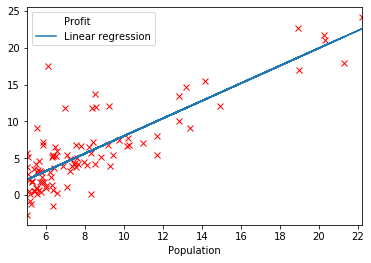

In [161]:
plt.figure()
ax = data1.plot(x='Population', y='Profit',  style=['rx'])
data1.plot(x='Population', y='Linear regression', ax=ax)

5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

In [162]:
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)
#theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

In [164]:
# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([[theta0_vals[i], theta1_vals[j]]])
        J_vals[i, j] = computeCost(X1.to_numpy(), y1.to_numpy(), t)
        
J_vals = J_vals.T

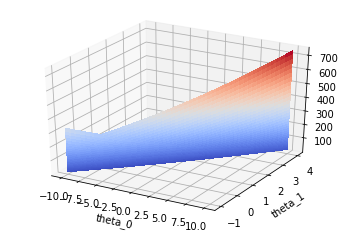

In [187]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('theta_0')
plt.ylabel('theta_1');

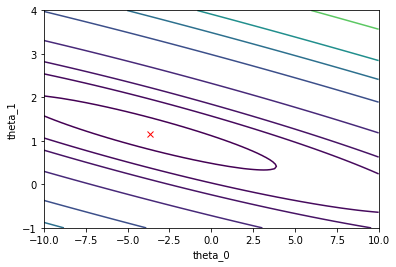

In [188]:
fig, ax = plt.subplots()
ax.contour(theta0_vals, theta1_vals, J_vals, levels=[10, 30, 50, 100, 200, 300, 400, 600, 800])
ax.plot([theta[0, 0]], [theta[0, 1]], 'rx')
plt.xlabel('theta_0')
plt.ylabel('theta_1');

6. Загрузите набор данных ex1data2.txt из текстового файла.

In [167]:
data_row2 = np.genfromtxt('ex1data2.txt', delimiter=',')
data2 = pd.DataFrame(data_row2, columns=list(['size of the house', 'number of bedrooms', 'price']))
data2.describe()

,size of the house,number of bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [168]:
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

def featureNormalization(X):
    norm = (X - X.mean(axis=0)) / X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return norm, mu, sigma
    

In [193]:
X = data2[['size of the house', 'number of bedrooms']]
X_norm, mu, sigma = featureNormalization(X)
X_norm.describe()

,size of the house,number of bedrooms
count,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16
std,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00
25%,-7.155897e-01,-2.236752e-01
50%,-1.417900e-01,-2.236752e-01
75%,3.376348e-01,1.090417e+00
max,3.117292e+00,2.404508e+00


In [194]:
y = data2['price']
m = y.size
n = data_row2.shape[1] # Size of feature vector
X.insert(0, 'theta_0', 1)
X_norm.insert(0, 'theta_0', 1)

theta1 = np.zeros((1, n)) # theta coeficents for hypothesis func
theta2 = np.zeros((1, n)) # theta coeficents for hypothesis func

In [171]:
(theta1, j_history) = gradientDescent(X.to_numpy(), y.to_numpy(), theta1, 0.00000001, 50)
(theta2, j_norm_history) = gradientDescent(X_norm.to_numpy(), y.to_numpy(), theta2, 0.1, 50)

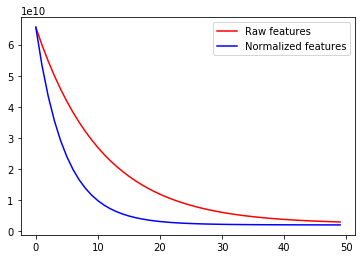

In [172]:
p1 = plt.plot(range(0, len(j_history)), j_history, color='red')
plt.legend('Raw features')
p2 = plt.plot(range(0, len(j_norm_history)), j_norm_history, color='blue')
plt.legend((p1[0], p2[0]), ('Raw features', 'Normalized features'))

8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

In [195]:
def gradientDescentV(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # Size of training set
    n = X.shape[1]  # Size of feature vector
    j_history = []
    XT = X.T
    for i in range(0, num_iters):
        h = [np.matmul(x, theta.T)[0] for x in X]
        loss = h - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.matmul(XT, loss) / m
        theta[0] -= alpha * gradient
        j_history.append(cost)

    return theta, j_history

In [226]:
iterations = 400
alpha = 0.01
theta_GD = np.zeros((1, n)) # theta coeficents for hypothesis func

(theta_GD, j_history) = gradientDescentV(X_norm.to_numpy(), y.to_numpy(), theta, alpha, iterations)
theta_GD

array([[340302.97100295, 108774.45499403,  -4793.34831831]])

In [236]:
price = np.array([1, (1650 - mu[0]) / sigma[0], (3 - mu[1]) / sigma[1]]) @ theta_GD.T
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): %f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293375.872187


9. Покажите, что векторизация дает прирост производительности.

In [202]:
from timeit import default_timer as timer

iterations = 1000
alpha = 0.02
theta = np.zeros((1, n))

start = timer()
(theta, j_history) = gradientDescent(X_norm.to_numpy(), y.to_numpy(), theta, alpha, iterations)
end = timer()
print("Theta %s | Execution time: %f" % (theta, end-start))

Theta [[340412.65900156 110620.78816241  -6639.21215439]] | Execution time: 0.639288


In [203]:
theta = np.zeros((1, n))

start = timer()
(theta, j_history) = gradientDescentV(X_norm.to_numpy(), y.to_numpy(), theta, alpha, iterations)
end = timer()
print("Theta %s | Execution time: %f" % (theta, end-start))

Theta [[340412.65900156 110620.78816241  -6639.21215439]] | Execution time: 0.151083


10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.

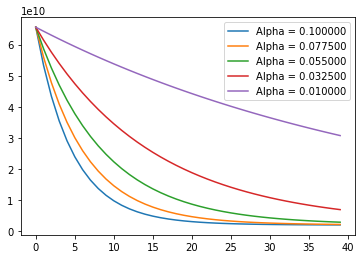

In [214]:
alphas = np.linspace(0.1, 0.01, num=5)
plots = []
for alpha in alphas:
    theta = np.zeros((1, n))
    (theta, j_history) = gradientDescentV(X_norm.to_numpy(), y.to_numpy(), theta, alpha, 40)
    p = plt.plot(range(0, len(j_history)), j_history)
    plots.append(p[0])
plt.legend(plots, ["Alpha = %f" % (x) for x in alphas])

11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

In [218]:
def normalEqn(X, y):
    XX = np.asmatrix(X)
    XT = XX.T
    return ((XT @ XX).I @ XT) @ y

In [234]:
theta_A = normalEqn(X.to_numpy(), y.to_numpy())
print('Theta computed from the normal equations: %s' % (theta_A))

Theta computed from the normal equations: [[89597.9095428    139.21067402 -8738.01911233]]


In [229]:
print('Theta computed from the normal normalized gradient descent: %s' % (theta_GD))

Theta computed from the normal normalized gradient descent: [[340302.97100295 108774.45499403  -4793.34831831]]


In [235]:
price = np.array([1, 1650, 3]) @ theta_A.T
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): %f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464335


In [232]:
price = np.array([1, (1650 - mu[0]) / sigma[0], (3 - mu[1]) / sigma[1]]) @ theta_GD.T
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): %f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293375.872187
